In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
# Machine learning
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
# Managing Warnings
import warnings
warnings.filterwarnings('ignore')
# Plot the Figures Inline
%matplotlib inline

In [9]:
df = pd.read_csv('130.csv')

In [10]:
df.head()

,visitors_pool_total,sportbad_closed,freizeitbad_closed,sauna_closed,kursbecken_closed,event,price_adult_90min,price_adult_max,price_reduced_90min,price_reduced_max,...,date_time (#1),Year,precipitation_DWD,snow_height_DWD,air_humidity_UniOS,air_pressure_UniOS,global_solar_radiation_UniOS,temperature_UniOS,wind_speed_avg_UniOS,wind_speed_max_UniOS
0,379,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-12,2009,0.3,0,59.702524,1008.544223,442.841165,13.766456,15.260097,56.14
1,529,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-13,2009,0.0,0,60.052847,1011.074097,394.124340,14.095799,8.132535,27.31
2,560,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-14,2009,2.5,0,73.884028,1007.893194,175.023299,15.738264,8.748437,39.67
3,435,0,1,1,0,0,4.6,7.6,2.6,4.6,...,2009-06-15,2009,2.1,0,78.727222,1005.882118,140.514861,15.605729,7.143438,31.21
4,288,0,1,1,0,0,4.6,7.6,2.6,4.6,...,2009-06-16,2009,0.3,0,75.718819,1009.652951,188.287639,13.548403,6.729271,32.66


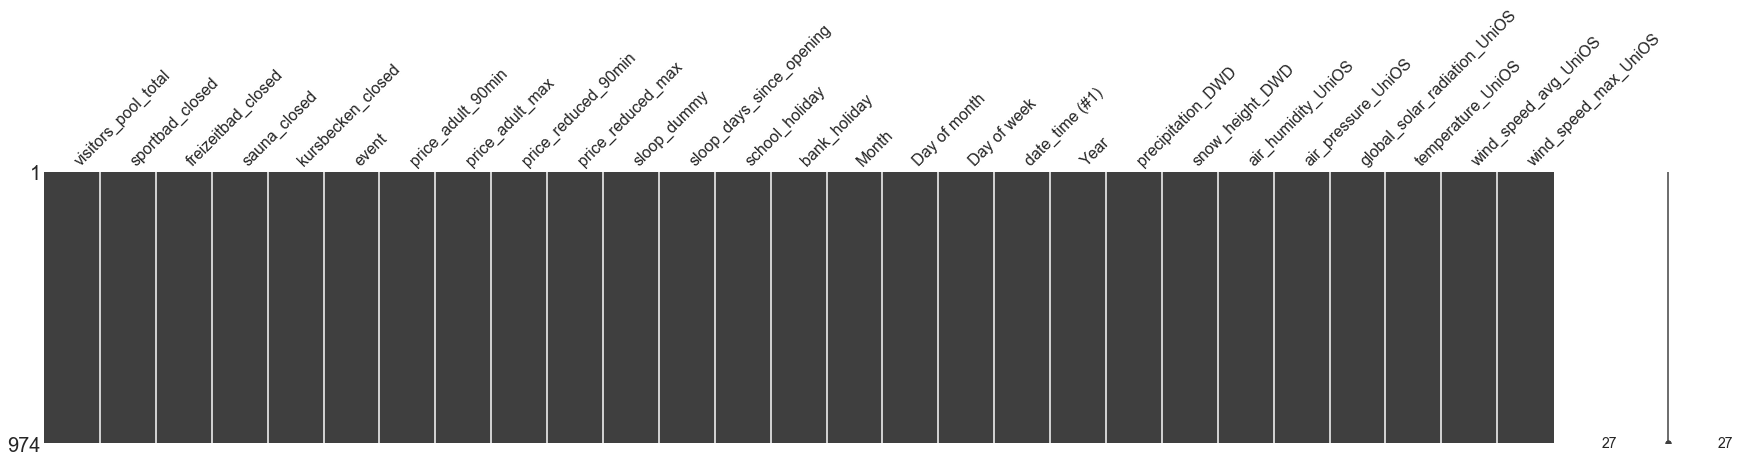

In [22]:
# How many missing values are there in our dataset?
missingno.matrix(df, figsize = (30,5))

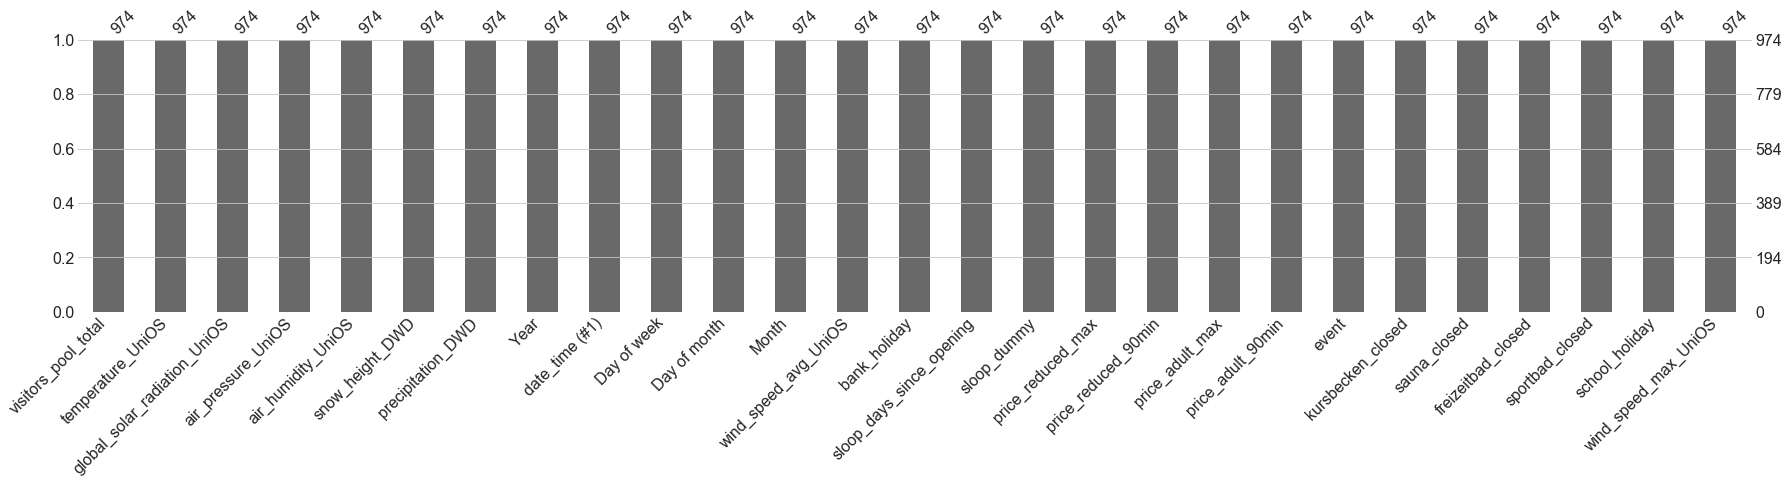

In [24]:
missingno.bar(df, sort='ascending', figsize = (30,5))

In [11]:
df['y'] = np.where(df['visitors_pool_total']>=1000, 1, 0)

In [4]:
del df['visitors_pool_total']

In [5]:
df.head()

,sportbad_closed,freizeitbad_closed,sauna_closed,kursbecken_closed,event,price_adult_90min,price_adult_max,price_reduced_90min,price_reduced_max,sloop_dummy,...,Year,precipitation_DWD,snow_height_DWD,air_humidity_UniOS,air_pressure_UniOS,global_solar_radiation_UniOS,temperature_UniOS,wind_speed_avg_UniOS,wind_speed_max_UniOS,y
0,0,1,1,0,1,4.6,7.6,2.6,4.6,0,...,2009,0.3,0,59.702524,1008.544223,442.841165,13.766456,15.260097,56.14,0
1,0,1,1,0,1,4.6,7.6,2.6,4.6,0,...,2009,0.0,0,60.052847,1011.074097,394.124340,14.095799,8.132535,27.31,0
2,0,1,1,0,1,4.6,7.6,2.6,4.6,0,...,2009,2.5,0,73.884028,1007.893194,175.023299,15.738264,8.748437,39.67,0
3,0,1,1,0,0,4.6,7.6,2.6,4.6,0,...,2009,2.1,0,78.727222,1005.882118,140.514861,15.605729,7.143438,31.21,0
4,0,1,1,0,0,4.6,7.6,2.6,4.6,0,...,2009,0.3,0,75.718819,1009.652951,188.287639,13.548403,6.729271,32.66,0


In [47]:
df.describe()

,sportbad_closed,freizeitbad_closed,sauna_closed,kursbecken_closed,event,price_adult_90min,price_adult_max,price_reduced_90min,price_reduced_max,sloop_dummy,...,Day of week,precipitation_DWD,snow_height_DWD,air_humidity_UniOS,air_pressure_UniOS,global_solar_radiation_UniOS,temperature_UniOS,wind_speed_avg_UniOS,wind_speed_max_UniOS,y
count,974.000000,974.000000,974.000000,974.0,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,...,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,0.103696,0.016427,0.040041,0.0,0.047228,4.703491,8.718686,2.796715,6.324641,0.280287,...,4.024641,2.301437,0.748460,79.206275,1003.016382,138.786684,10.345853,10.796670,39.495123,0.445585
std,0.305023,0.127176,0.196156,0.0,0.212235,0.142681,1.197857,0.229010,1.846696,0.449370,...,1.990576,5.999597,3.036837,11.265120,8.997975,101.791026,7.407055,4.504442,13.240904,0.497286
min,0.000000,0.000000,0.000000,0.0,0.000000,4.600000,7.600000,2.600000,4.600000,0.000000,...,1.000000,0.000000,0.000000,41.534062,968.892431,1.641053,-11.855903,0.477674,6.670000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,4.600000,7.600000,2.600000,4.600000,0.000000,...,2.000000,0.000000,0.000000,72.555668,997.650955,45.102083,5.428549,7.487899,30.200000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,4.600000,7.600000,2.600000,4.600000,0.000000,...,4.000000,0.100000,0.000000,81.171510,1003.245052,118.539722,10.501632,10.118819,37.510000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,4.900000,10.000000,3.100000,8.300000,1.000000,...,6.000000,2.600000,0.000000,87.771189,1009.012179,216.850807,16.245314,13.273238,47.047500,1.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,4.900000,10.000000,3.100000,8.300000,1.000000,...,7.000000,131.100000,24.000000,99.800000,1028.601389,442.841165,33.834098,32.978681,91.080000,1.000000


In [7]:
list(df.columns)

['sportbad_closed',
 'freizeitbad_closed',
 'sauna_closed',
 'kursbecken_closed',
 'event',
 'price_adult_90min',
 'price_adult_max',
 'price_reduced_90min',
 'price_reduced_max',
 'sloop_dummy',
 'sloop_days_since_opening',
 'school_holiday',
 'bank_holiday',
 'Month',
 'Day of month',
 'Day of week',
 'precipitation_DWD',
 'snow_height_DWD',
 'air_humidity_UniOS',
 'air_pressure_UniOS',
 'global_solar_radiation_UniOS',
 'temperature_UniOS',
 'wind_speed_avg_UniOS',
 'wind_speed_max_UniOS',
 'y']

In [12]:
del df['date_time (#1)']
del df['Year']

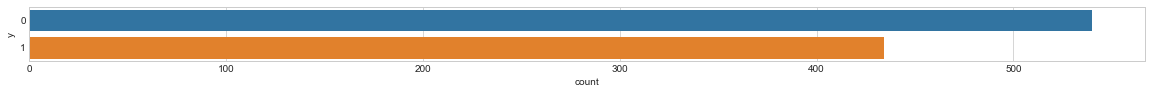

In [55]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,1))
sns.countplot(y="y", data=df);

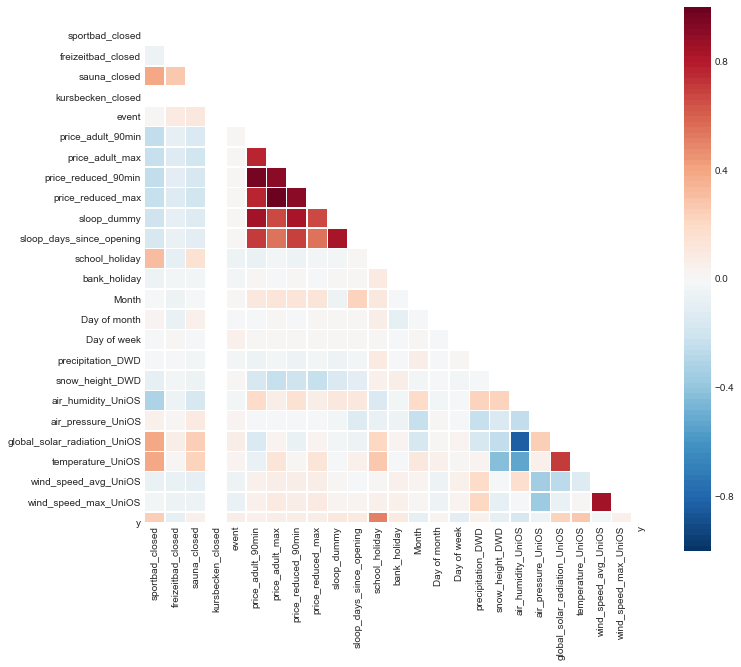

In [57]:
# Create a correlation plot of both datasets.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),
            vmin=-1, vmax=1,
            square=True,
            cmap=sns.color_palette("RdBu_r", 100),
            mask=mask,
            linewidths=.5);

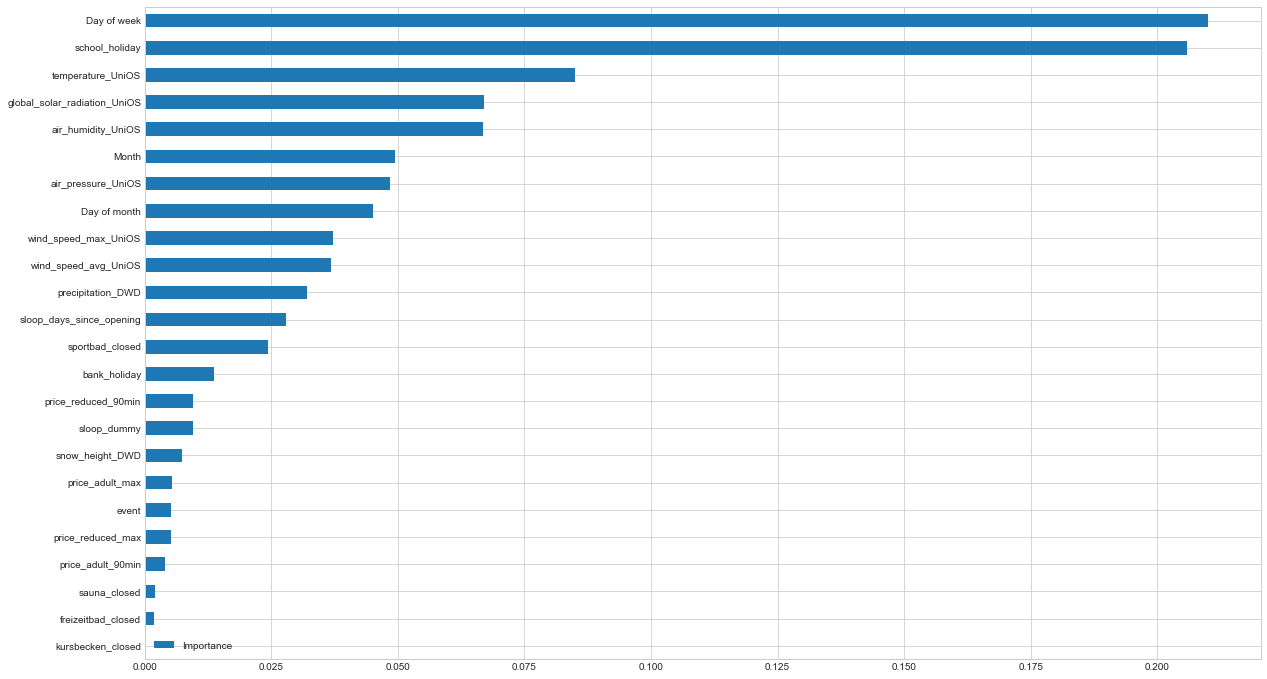

In [60]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('y', axis=1), df['y'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('y', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

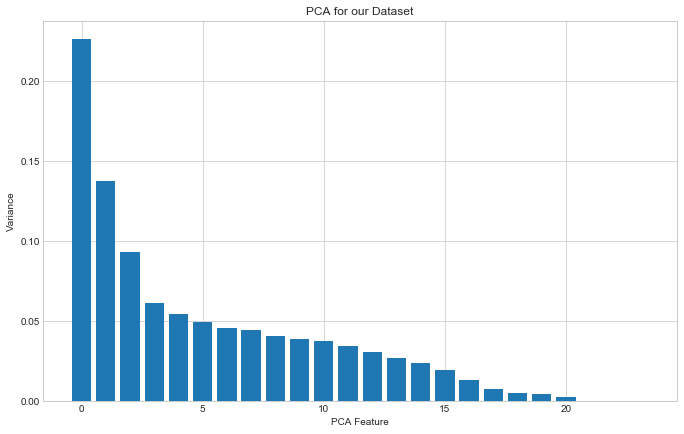

In [62]:
# Calculating PCA and graphing the Variance for each feature
std_scale = preprocessing.StandardScaler().fit(df.drop('y', axis=1))
X = std_scale.transform(df.drop('y', axis=1))
pca1 = PCA(n_components=len(df.columns)-1)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for our Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

In [8]:
# 80% train 20% test
from sklearn.model_selection import train_test_split
y = df['y']
del df['y']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(779, 24) (779,)
(195, 24) (195,)


In [140]:
X_train.head()

,sportbad_closed,freizeitbad_closed,sauna_closed,kursbecken_closed,event,price_adult_90min,price_adult_max,price_reduced_90min,price_reduced_max,sloop_dummy,...,Day of month,Day of week,precipitation_DWD,snow_height_DWD,air_humidity_UniOS,air_pressure_UniOS,global_solar_radiation_UniOS,temperature_UniOS,wind_speed_avg_UniOS,wind_speed_max_UniOS
340,0,0,0,0,1,4.6,7.6,2.6,4.6,0,...,19,1,0.4,0,81.533125,1004.441389,99.645208,10.746840,14.949618,38.56
313,0,0,0,0,0,4.6,7.6,2.6,4.6,0,...,10,3,4.1,0,70.454965,1002.745417,230.280521,19.887361,8.616806,37.51
874,0,0,0,0,0,4.9,10.0,3.1,8.3,1,...,22,4,0.0,0,73.461875,1002.966736,225.337292,18.894410,14.936146,48.09
899,0,0,0,0,0,4.9,10.0,3.1,8.3,1,...,19,4,0.3,0,79.847604,1004.552222,187.416424,9.697188,12.231979,48.09
211,0,0,0,0,0,4.6,7.6,2.6,4.6,0,...,25,5,0.0,0,60.662292,995.246493,155.238438,14.904479,9.713438,52.82


In [141]:
y_train.head()

340    1
313    0
874    1
899    0
211    0
Name: y, dtype: int64

In [142]:
X_test.head()

,sportbad_closed,freizeitbad_closed,sauna_closed,kursbecken_closed,event,price_adult_90min,price_adult_max,price_reduced_90min,price_reduced_max,sloop_dummy,...,Day of month,Day of week,precipitation_DWD,snow_height_DWD,air_humidity_UniOS,air_pressure_UniOS,global_solar_radiation_UniOS,temperature_UniOS,wind_speed_avg_UniOS,wind_speed_max_UniOS
236,0,0,0,0,0,4.6,7.6,2.6,4.6,0,...,1,7,0.8,0,75.399063,998.120521,247.249861,11.174965,12.257049,54.99
310,0,0,1,0,0,4.6,7.6,2.6,4.6,0,...,7,7,2.4,0,67.121597,1006.515174,273.201597,18.525521,5.839097,35.58
505,0,0,0,0,0,4.6,7.6,2.6,4.6,0,...,13,4,0.0,0,67.564375,1008.147500,207.628437,8.227153,14.115104,44.90
56,0,0,0,0,0,4.6,7.6,2.6,4.6,0,...,17,2,3.5,0,77.431632,1003.423958,225.027708,18.638333,10.364132,40.86
242,0,1,0,0,0,4.6,7.6,2.6,4.6,0,...,8,7,0.0,0,85.232049,998.041667,98.391701,8.071007,4.912674,23.72


In [143]:
y_test.head()

236    1
310    0
505    0
56     0
242    0
Name: y, dtype: int64

In [144]:
list(df.columns)

['sportbad_closed',
 'freizeitbad_closed',
 'sauna_closed',
 'kursbecken_closed',
 'event',
 'price_adult_90min',
 'price_adult_max',
 'price_reduced_90min',
 'price_reduced_max',
 'sloop_dummy',
 'sloop_days_since_opening',
 'school_holiday',
 'bank_holiday',
 'Month',
 'Day of month',
 'Day of week',
 'precipitation_DWD',
 'snow_height_DWD',
 'air_humidity_UniOS',
 'air_pressure_UniOS',
 'global_solar_radiation_UniOS',
 'temperature_UniOS',
 'wind_speed_avg_UniOS',
 'wind_speed_max_UniOS']

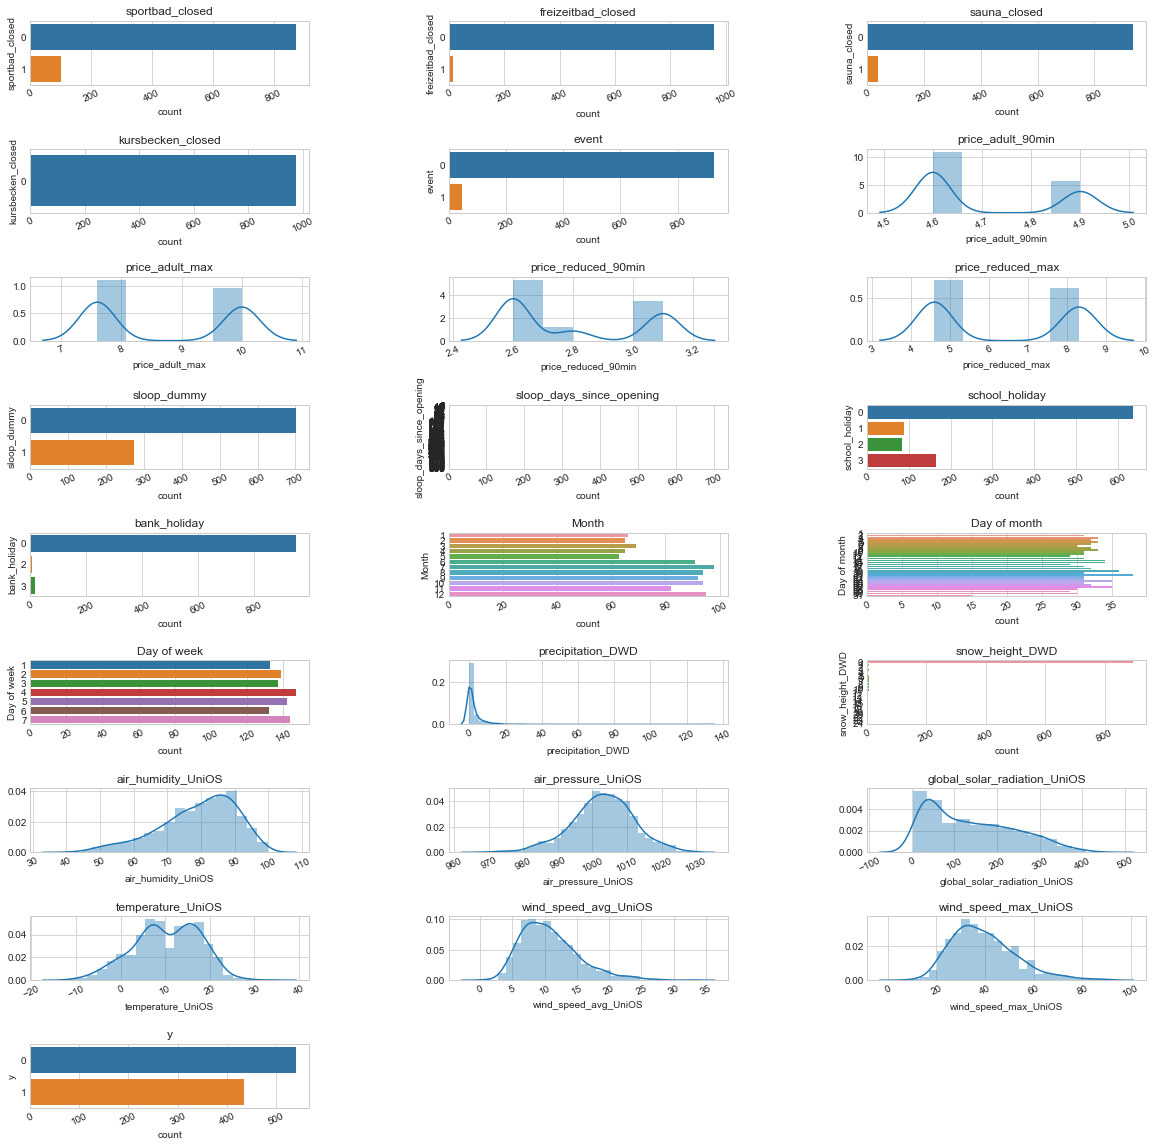

In [134]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=1, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == int:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
plot_distribution(df, cols=3, width=20, height=20, hspace=1, wspace=0.5)

In [145]:
import random
random.seed(12345)

In [146]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [147]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression,
                          KNeighborsClassifier,
                          GaussianNB,
                          DecisionTreeClassifier,
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2)
    # CV
    train_pred = model_selection.cross_val_predict(algo,
                                                   X_train,
                                                   y_train,
                                                   cv=cv,
                                                   n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [148]:
# Logistic Regression - Random Search for Hyperparameters
# Utility function to report best scores
import time
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'],
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000),
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc,
                                   n_jobs=-1,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search)
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 6.56 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.756 (std: 0.020)
Parameters: {'penalty': 'l1', 'intercept_scaling': 2.7838412414827726e-14, 'class_weight': None, 'C': 83.59729389164188}

Model with rank: 2
Mean validation score: 0.754 (std: 0.019)
Parameters: {'penalty': 'l2', 'intercept_scaling': 2.7092138325023853e-12, 'class_weight': None, 'C': 37962773676000.305}

Model with rank: 3
Mean validation score: 0.750 (std: 0.013)
Parameters: {'penalty': 'l1', 'intercept_scaling': 12218241385.477407, 'class_weight': 'balanced', 'C': 168.35368321843177}

Model with rank: 4
Mean validation score: 0.748 (std: 0.009)
Parameters: {'penalty': 'l2', 'intercept_scaling': 3650.532637751644, 'class_weight': 'balanced', 'C': 5.443441843269567e+18}

Model with rank: 4
Mean validation score: 0.748 (std: 0.009)
Parameters: {'penalty': 'l2', 'intercept_scaling': 0.0021170571075484748, 'class_weight': 'balanced', 'C': 1063904608.86171

In [149]:
# Logistic Regression
import datetime
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1),
X_train,
y_train,
X_test,
10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 76.41
Accuracy CV 10-Fold: 77.66
Running Time: 0:00:00.263134


In [150]:
print(metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       433
           1       0.79      0.67      0.73       346

    accuracy                           0.78       779
   macro avg       0.78      0.77      0.77       779
weighted avg       0.78      0.78      0.77       779



In [151]:
print(metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       107
           1       0.79      0.65      0.71        88

    accuracy                           0.76       195
   macro avg       0.77      0.75      0.76       195
weighted avg       0.77      0.76      0.76       195



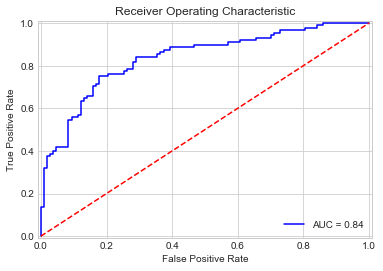

In [152]:
plot_roc_curve(y_test, probs_log)

In [153]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1),
                                                                                                 X_train,
                                                                                                 y_train,
                                                                                                 X_test,
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 62.56
Accuracy CV 10-Fold: 62.39
Running Time: 0:00:00.913213


In [154]:
print(metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67       433
           1       0.58      0.54      0.56       346

    accuracy                           0.62       779
   macro avg       0.62      0.62      0.62       779
weighted avg       0.62      0.62      0.62       779



In [155]:
print(metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.63      0.75      0.69       107
           1       0.61      0.48      0.54        88

    accuracy                           0.63       195
   macro avg       0.62      0.61      0.61       195
weighted avg       0.62      0.63      0.62       195



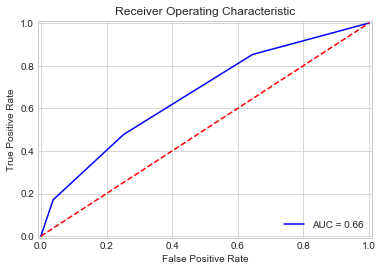

In [156]:
plot_roc_curve(y_test, probs_knn)

In [157]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(),
                                                                                     X_train,
                                                                                     y_train,
                                                                                     X_test,
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.46
Accuracy CV 10-Fold: 73.94
Running Time: 0:00:00.153062


In [158]:
print(metrics.classification_report(y_train, train_pred_gaussian))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       433
           1       0.72      0.67      0.70       346

    accuracy                           0.74       779
   macro avg       0.74      0.73      0.73       779
weighted avg       0.74      0.74      0.74       779



In [159]:
print(metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       107
           1       0.77      0.75      0.76        88

    accuracy                           0.78       195
   macro avg       0.78      0.78      0.78       195
weighted avg       0.78      0.78      0.78       195



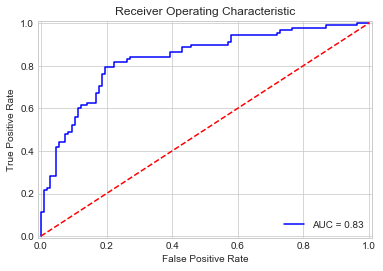

In [160]:
plot_roc_curve(y_test, probs_gau)

In [161]:
# Linear SVC
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train,
                                                                                           y_train,
                                                                                           X_test,
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 52.82
Accuracy CV 10-Fold: 54.69
Running Time: 0:00:00.534076


In [162]:
print(metrics.classification_report(y_train, train_pred_svc))

              precision    recall  f1-score   support

           0       0.62      0.47      0.54       433
           1       0.49      0.64      0.56       346

    accuracy                           0.55       779
   macro avg       0.56      0.56      0.55       779
weighted avg       0.56      0.55      0.55       779



In [165]:
print(metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.16      0.27       107
           1       0.49      0.98      0.65        88

    accuracy                           0.53       195
   macro avg       0.69      0.57      0.46       195
weighted avg       0.71      0.53      0.44       195



In [166]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1),
                                                                 X_train,
                                                                 y_train,
                                                                 X_test,
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 54.87
Accuracy CV 10-Fold: 56.35
Running Time: 0:00:00.176253


In [167]:
print(metrics.classification_report(y_train, train_pred_sgd))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       433
           1       0.51      0.53      0.52       346

    accuracy                           0.56       779
   macro avg       0.56      0.56      0.56       779
weighted avg       0.57      0.56      0.56       779



In [168]:
print(metrics.classification_report(y_test, test_pred_sgd))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       107
           1       0.00      0.00      0.00        88

    accuracy                           0.55       195
   macro avg       0.27      0.50      0.35       195
weighted avg       0.30      0.55      0.39       195



In [169]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(),
                                                             X_train,
                                                             y_train,
                                                             X_test,
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 85.13
Accuracy CV 10-Fold: 87.29
Running Time: 0:00:00.167689


In [170]:
print(metrics.classification_report(y_train, train_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       433
           1       0.85      0.87      0.86       346

    accuracy                           0.87       779
   macro avg       0.87      0.87      0.87       779
weighted avg       0.87      0.87      0.87       779



In [171]:
print(metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.86      0.80      0.83        88

    accuracy                           0.85       195
   macro avg       0.85      0.85      0.85       195
weighted avg       0.85      0.85      0.85       195



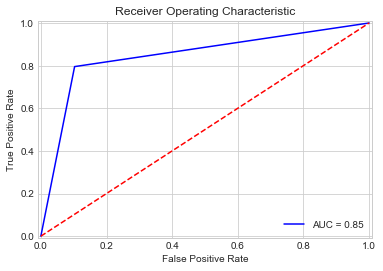

In [172]:
plot_roc_curve(y_test, probs_dt)

In [173]:
# Random Forest Classifier - Random Search for Hyperparameters
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc,
                                   n_jobs = -1,
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search)
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 0.47 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.882 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.881 (std: 0.012)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 6, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.879 (std: 0.009)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 10}

Model with rank: 4
Mean validation score: 0.864 (std: 0.022)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 15}

Model with rank: 5
Mean validation score: 0.863 (std: 0.020)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_dep

In [174]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10,
                             min_samples_leaf=2,
                             min_samples_split=17,
                             criterion='gini',
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc,
                                                            X_train,
                                                            y_train,
                                                            X_test,
                                                            10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 85.64
Accuracy CV 10-Fold: 87.93
Running Time: 0:00:00.249290


In [175]:
print(metrics.classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       433
           1       0.84      0.90      0.87       346

    accuracy                           0.88       779
   macro avg       0.88      0.88      0.88       779
weighted avg       0.88      0.88      0.88       779



In [176]:
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.83      0.85      0.84        88

    accuracy                           0.86       195
   macro avg       0.85      0.86      0.86       195
weighted avg       0.86      0.86      0.86       195



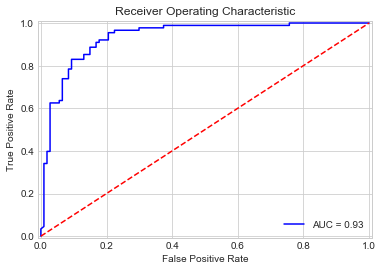

In [177]:
plot_roc_curve(y_test, probs_rf)

In [178]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(),
                                                                 X_train,
                                                                 y_train,
                                                                 X_test,
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 87.69
Accuracy CV 10-Fold: 90.37
Running Time: 0:00:00.913207


In [179]:
print(metrics.classification_report(y_train, train_pred_gbt))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       433
           1       0.87      0.92      0.89       346

    accuracy                           0.90       779
   macro avg       0.90      0.90      0.90       779
weighted avg       0.90      0.90      0.90       779



In [180]:
print(metrics.classification_report(y_test, test_pred_gbt))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       107
           1       0.87      0.85      0.86        88

    accuracy                           0.88       195
   macro avg       0.88      0.87      0.88       195
weighted avg       0.88      0.88      0.88       195



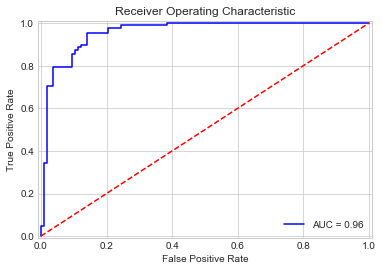

In [181]:
plot_roc_curve(y_test, probs_gbt)

In [182]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees'],
'Score': [
acc_knn,
acc_log,
acc_rf,
acc_gaussian,
acc_sgd,
acc_linear_svc,
acc_dt,
acc_gbt
]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,87.69
2,Random Forest,85.64
6,Decision Tree,85.13
3,Naive Bayes,78.46
1,Logistic Regression,76.41
0,KNN,62.56
4,Stochastic Gradient Decent,54.87
5,Linear SVC,52.82


In [183]:
models = pd.DataFrame({
'Model': ['KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree', 'Gradient Boosting Trees'],
'Score': [
acc_cv_knn,
acc_cv_log,
acc_cv_rf,
acc_cv_gaussian,
acc_cv_sgd,
acc_cv_linear_svc,
acc_cv_dt,
acc_cv_gbt
]})
models.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,90.37
2,Random Forest,87.93
6,Decision Tree,87.29
1,Logistic Regression,77.66
3,Naive Bayes,73.94
0,KNN,62.39
4,Stochastic Gradient Decent,56.35
5,Linear SVC,54.69


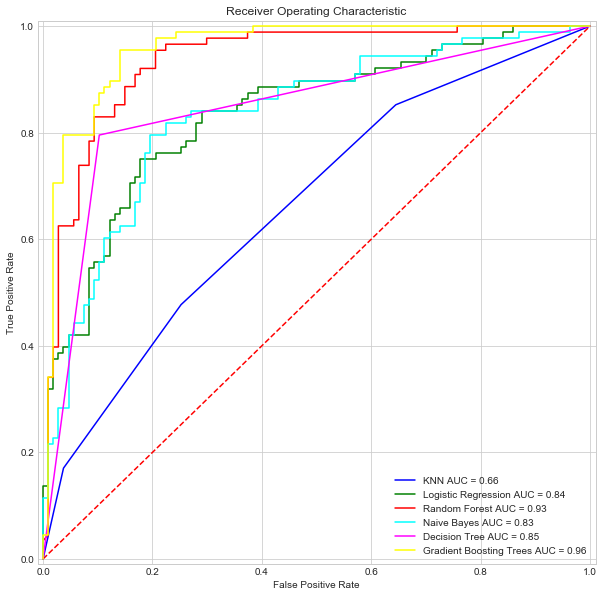

In [184]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10))
models = [
'KNN',
'Logistic Regression',
'Random Forest',
'Naive Bayes',
'Decision Tree',
'Gradient Boosting Trees'
]
probs = [
probs_knn,
probs_log,
probs_rf,
probs_gau,
probs_dt,
probs_gbt
]
colors = [
'blue',
'green',
'red',
'cyan',
'magenta',
'yellow',
]
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
plt.show()

In [186]:
# Neural Network
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [187]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

W0910 23:21:43.079916 140536024631104 deprecation_wrapper.py:119] From /home/ottolins/anaconda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0910 23:21:43.111778 140536024631104 deprecation_wrapper.py:119] From /home/ottolins/anaconda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0910 23:21:43.116957 140536024631104 deprecation_wrapper.py:119] From /home/ottolins/anaconda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [188]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

W0910 23:22:39.417870 140536024631104 deprecation_wrapper.py:119] From /home/ottolins/anaconda/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0910 23:22:39.450054 140536024631104 deprecation_wrapper.py:119] From /home/ottolins/anaconda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0910 23:22:39.455632 140536024631104 deprecation.py:323] From /home/ottolins/anaconda/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [210]:
net = model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

Train on 779 samples, validate on 195 samples
Epoch 1/10
779/779 [==============================] - 0s 69us/step - loss: 0.4027 - acc: 0.8203 - val_loss: 0.3912 - val_acc: 0.8103
Epoch 2/10
779/779 [==============================] - 0s 106us/step - loss: 0.3947 - acc: 0.8177 - val_loss: 0.3584 - val_acc: 0.8154
Epoch 3/10
779/779 [==============================] - 0s 139us/step - loss: 0.3846 - acc: 0.8190 - val_loss: 0.3752 - val_acc: 0.8154
Epoch 4/10
779/779 [==============================] - 0s 88us/step - loss: 0.3856 - acc: 0.8203 - val_loss: 0.3708 - val_acc: 0.8000
Epoch 5/10
779/779 [==============================] - 0s 101us/step - loss: 0.3856 - acc: 0.8151 - val_loss: 0.3579 - val_acc: 0.8256
Epoch 6/10
779/779 [==============================] - 0s 129us/step - loss: 0.3933 - acc: 0.8190 - val_loss: 0.3598 - val_acc: 0.8103
Epoch 7/10
779/779 [==============================] - 0s 116us/step - loss: 0.3849 - acc: 0.8216 - val_loss: 0.3621 - val_acc: 0.8103
Epoch 8/10
779/779

In [212]:
evaluation = model.evaluate(x=X_test, y=y_test, batch_size=32, verbose=1) 
evaluation

195/195 [==============================] - 0s 29us/step


[0.3729839951564104, 0.8102564104092427]

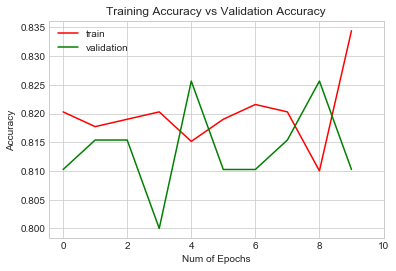

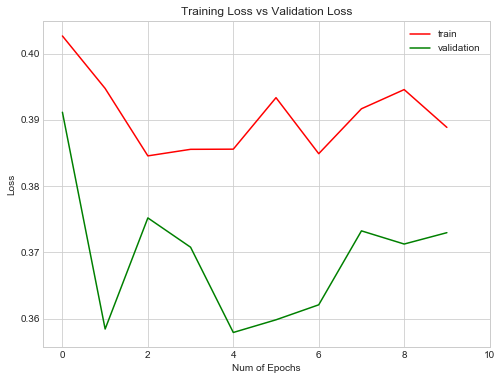

In [214]:
plt.figure(0) 
plt.plot(net.history['acc'],'r') 
plt.plot(net.history['val_acc'],'g') 
plt.xticks(np.arange(0, 11, 2.0)) 
plt.rcParams['figure.figsize'] = (8, 6) 
plt.xlabel("Num of Epochs") 
plt.ylabel("Accuracy") 
plt.title("Training Accuracy vs Validation Accuracy") 
plt.legend(['train','validation']) 

plt.figure(1) 
plt.plot(net.history['loss'],'r') 
plt.plot(net.history['val_loss'],'g') 
plt.xticks(np.arange(0, 11, 2.0)) 
plt.rcParams['figure.figsize'] = (8, 6) 
plt.xlabel("Num of Epochs") 
plt.ylabel("Loss") 
plt.title("Training Loss vs Validation Loss") 
plt.legend(['train','validation']) 

plt.show()

In [215]:
net_pred = model.predict(X_test, batch_size=32, verbose=1) 
net_predicted = np.argmax(net_pred, axis=1)

195/195 [==============================] - 0s 32us/step


In [225]:
# fit the keras model on the dataset
model.fit(df, y, epochs=1000, batch_size=32)

Epoch 1/1000
974/974 [==============================] - 0s 68us/step - loss: 0.3823 - acc: 0.8203
Epoch 2/1000
974/974 [==============================] - 0s 98us/step - loss: 0.3799 - acc: 0.8193
Epoch 3/1000
974/974 [==============================] - 0s 111us/step - loss: 0.3826 - acc: 0.8214
Epoch 4/1000
974/974 [==============================] - 0s 99us/step - loss: 0.3869 - acc: 0.8162
Epoch 5/1000
974/974 [==============================] - 0s 106us/step - loss: 0.3823 - acc: 0.8255
Epoch 6/1000
974/974 [==============================] - 0s 88us/step - loss: 0.3777 - acc: 0.8244
Epoch 7/1000
974/974 [==============================] - 0s 113us/step - loss: 0.3847 - acc: 0.8039
Epoch 8/1000
974/974 [==============================] - 0s 122us/step - loss: 0.3871 - acc: 0.8183
Epoch 9/1000
974/974 [==============================] - 0s 128us/step - loss: 0.3859 - acc: 0.8203
Epoch 10/1000
974/974 [==============================] - 0s 100us/step - loss: 0.3904 - acc: 0.8131
Epoch 11/1000

974/974 [==============================] - 0s 63us/step - loss: 0.3781 - acc: 0.8224
Epoch 165/1000
974/974 [==============================] - 0s 62us/step - loss: 0.3904 - acc: 0.8162
Epoch 166/1000
974/974 [==============================] - 0s 59us/step - loss: 0.4036 - acc: 0.8029
Epoch 167/1000
974/974 [==============================] - 0s 52us/step - loss: 0.3906 - acc: 0.8172
Epoch 168/1000
974/974 [==============================] - 0s 59us/step - loss: 0.3961 - acc: 0.8142
Epoch 169/1000
974/974 [==============================] - 0s 55us/step - loss: 0.3847 - acc: 0.8244
Epoch 170/1000
974/974 [==============================] - 0s 52us/step - loss: 0.4012 - acc: 0.8049
Epoch 171/1000
974/974 [==============================] - 0s 76us/step - loss: 0.3892 - acc: 0.8224
Epoch 172/1000
974/974 [==============================] - 0s 134us/step - loss: 0.3925 - acc: 0.8101
Epoch 173/1000
974/974 [==============================] - 0s 160us/step - loss: 0.3814 - acc: 0.8265
Epoch 174/100

974/974 [==============================] - 0s 51us/step - loss: 0.4042 - acc: 0.8090
Epoch 327/1000
974/974 [==============================] - 0s 80us/step - loss: 0.3881 - acc: 0.8142
Epoch 328/1000
974/974 [==============================] - 0s 53us/step - loss: 0.3818 - acc: 0.8275
Epoch 329/1000
974/974 [==============================] - 0s 62us/step - loss: 0.3794 - acc: 0.8234
Epoch 330/1000
974/974 [==============================] - 0s 46us/step - loss: 0.3879 - acc: 0.8162
Epoch 331/1000
974/974 [==============================] - 0s 47us/step - loss: 0.3821 - acc: 0.8121
Epoch 332/1000
974/974 [==============================] - 0s 64us/step - loss: 0.3815 - acc: 0.8172
Epoch 333/1000
974/974 [==============================] - 0s 78us/step - loss: 0.4055 - acc: 0.8090
Epoch 334/1000
974/974 [==============================] - 0s 105us/step - loss: 0.4187 - acc: 0.8060
Epoch 335/1000
974/974 [==============================] - 0s 103us/step - loss: 0.3924 - acc: 0.8234
Epoch 336/100

974/974 [==============================] - 0s 85us/step - loss: 0.3886 - acc: 0.8234
Epoch 489/1000
974/974 [==============================] - 0s 105us/step - loss: 0.3680 - acc: 0.8368
Epoch 490/1000
974/974 [==============================] - 0s 56us/step - loss: 0.4005 - acc: 0.8111
Epoch 491/1000
974/974 [==============================] - 0s 58us/step - loss: 0.3879 - acc: 0.8183
Epoch 492/1000
974/974 [==============================] - 0s 69us/step - loss: 0.3943 - acc: 0.8060
Epoch 493/1000
974/974 [==============================] - 0s 70us/step - loss: 0.3801 - acc: 0.8224
Epoch 494/1000
974/974 [==============================] - 0s 71us/step - loss: 0.4183 - acc: 0.8029
Epoch 495/1000
974/974 [==============================] - 0s 65us/step - loss: 0.4023 - acc: 0.8214
Epoch 496/1000
974/974 [==============================] - 0s 64us/step - loss: 0.3866 - acc: 0.8306
Epoch 497/1000
974/974 [==============================] - 0s 78us/step - loss: 0.3922 - acc: 0.8183
Epoch 498/1000

974/974 [==============================] - 0s 36us/step - loss: 0.3894 - acc: 0.8152
Epoch 651/1000
974/974 [==============================] - 0s 40us/step - loss: 0.3796 - acc: 0.8306
Epoch 652/1000
974/974 [==============================] - 0s 41us/step - loss: 0.3785 - acc: 0.8255
Epoch 653/1000
974/974 [==============================] - 0s 37us/step - loss: 0.3814 - acc: 0.8183
Epoch 654/1000
974/974 [==============================] - 0s 39us/step - loss: 0.3853 - acc: 0.8172
Epoch 655/1000
974/974 [==============================] - 0s 38us/step - loss: 0.3970 - acc: 0.8142
Epoch 656/1000
974/974 [==============================] - 0s 39us/step - loss: 0.3834 - acc: 0.8255
Epoch 657/1000
974/974 [==============================] - 0s 37us/step - loss: 0.3759 - acc: 0.8234
Epoch 658/1000
974/974 [==============================] - 0s 36us/step - loss: 0.3779 - acc: 0.8234
Epoch 659/1000
974/974 [==============================] - 0s 38us/step - loss: 0.3784 - acc: 0.8172
Epoch 660/1000


Epoch 732/1000
974/974 [==============================] - 0s 148us/step - loss: 0.4068 - acc: 0.8049
Epoch 733/1000
974/974 [==============================] - 0s 133us/step - loss: 0.3927 - acc: 0.8162
Epoch 734/1000
974/974 [==============================] - 0s 127us/step - loss: 0.3831 - acc: 0.8162
Epoch 735/1000
974/974 [==============================] - 0s 121us/step - loss: 0.3864 - acc: 0.8193
Epoch 736/1000
974/974 [==============================] - 0s 128us/step - loss: 0.3845 - acc: 0.8285
Epoch 737/1000
974/974 [==============================] - 0s 191us/step - loss: 0.3769 - acc: 0.8214
Epoch 738/1000
974/974 [==============================] - 0s 202us/step - loss: 0.3788 - acc: 0.8111
Epoch 739/1000
974/974 [==============================] - 0s 129us/step - loss: 0.3784 - acc: 0.8265
Epoch 740/1000
974/974 [==============================] - 0s 131us/step - loss: 0.3829 - acc: 0.8142
Epoch 741/1000
974/974 [==============================] - 0s 143us/step - loss: 0.3768 - ac

Epoch 895/1000
974/974 [==============================] - 0s 46us/step - loss: 0.3911 - acc: 0.8172
Epoch 896/1000
974/974 [==============================] - 0s 49us/step - loss: 0.3809 - acc: 0.8255
Epoch 897/1000
974/974 [==============================] - 0s 50us/step - loss: 0.3736 - acc: 0.8214
Epoch 898/1000
974/974 [==============================] - 0s 49us/step - loss: 0.3998 - acc: 0.8234
Epoch 899/1000
974/974 [==============================] - 0s 47us/step - loss: 0.3874 - acc: 0.8244
Epoch 900/1000
974/974 [==============================] - 0s 51us/step - loss: 0.3815 - acc: 0.8214
Epoch 901/1000
974/974 [==============================] - 0s 79us/step - loss: 0.3871 - acc: 0.8152
Epoch 902/1000
974/974 [==============================] - 0s 68us/step - loss: 0.3819 - acc: 0.8152
Epoch 903/1000
974/974 [==============================] - 0s 41us/step - loss: 0.3824 - acc: 0.8255
Epoch 904/1000
974/974 [==============================] - 0s 50us/step - loss: 0.3768 - acc: 0.8275


In [226]:
# evaluate the keras model
_, accuracy = model.evaluate(df, y)
print('Accuracy: %.2f' % (accuracy*100))

974/974 [==============================] - 0s 68us/step
Accuracy: 82.55


## Regression

In [5]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [220]:
df1 = pd.read_csv('130.csv')

In [2]:
df1.head()

,visitors_pool_total,sportbad_closed,freizeitbad_closed,sauna_closed,kursbecken_closed,event,price_adult_90min,price_adult_max,price_reduced_90min,price_reduced_max,...,date_time (#1),Year,precipitation_DWD,snow_height_DWD,air_humidity_UniOS,air_pressure_UniOS,global_solar_radiation_UniOS,temperature_UniOS,wind_speed_avg_UniOS,wind_speed_max_UniOS
0,379,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-12,2009,0.3,0,59.702524,1008.544223,442.841165,13.766456,15.260097,56.14
1,529,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-13,2009,0.0,0,60.052847,1011.074097,394.124340,14.095799,8.132535,27.31
2,560,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-14,2009,2.5,0,73.884028,1007.893194,175.023299,15.738264,8.748437,39.67
3,435,0,1,1,0,0,4.6,7.6,2.6,4.6,...,2009-06-15,2009,2.1,0,78.727222,1005.882118,140.514861,15.605729,7.143438,31.21
4,288,0,1,1,0,0,4.6,7.6,2.6,4.6,...,2009-06-16,2009,0.3,0,75.718819,1009.652951,188.287639,13.548403,6.729271,32.66


In [7]:
# summarize the distribution of each attribute
set_option('precision' , 1)
print(df1.describe())

       visitors_pool_total  sportbad_closed  freizeitbad_closed  sauna_closed  \
count                974.0            974.0             9.7e+02       9.7e+02   
mean                1092.4              0.1             1.6e-02       4.0e-02   
std                  598.5              0.3             1.3e-01       2.0e-01   
min                  191.0              0.0             0.0e+00       0.0e+00   
25%                  616.5              0.0             0.0e+00       0.0e+00   
50%                  905.5              0.0             0.0e+00       0.0e+00   
75%                 1475.2              0.0             0.0e+00       0.0e+00   
max                 4514.0              1.0             1.0e+00       1.0e+00   

       kursbecken_closed    event  price_adult_90min  price_adult_max  \
count              974.0  9.7e+02              974.0            974.0   
mean                 0.0  4.7e-02                4.7              8.7   
std                  0.0  2.1e-01                0.

In [12]:
# correlation between all numeric attributes
set_option('precision', 2)
print(df1.corr(method='pearson'))

                              visitors_pool_total  sportbad_closed  \
visitors_pool_total                      1.00e+00         2.66e-01   
sportbad_closed                          2.66e-01         1.00e+00   
freizeitbad_closed                      -1.41e-01        -4.40e-02   
sauna_closed                             2.71e-02         3.94e-01   
kursbecken_closed                             NaN              NaN   
event                                    5.21e-02         3.65e-03   
price_adult_90min                        1.31e-01        -2.47e-01   
price_adult_max                          1.74e-01        -2.23e-01   
price_reduced_90min                      1.58e-01        -2.51e-01   
price_reduced_max                        1.74e-01        -2.23e-01   
sloop_dummy                              2.06e-01        -2.12e-01   
sloop_days_since_opening                 1.32e-01        -1.78e-01   
school_holiday                           4.94e-01         3.19e-01   
bank_holiday        

In [221]:
df1.rename(columns = {"visitors_pool_total": "y"}, 
                     inplace = True)

In [216]:
df1.head()

,y,sportbad_closed,freizeitbad_closed,sauna_closed,kursbecken_closed,event,price_adult_90min,price_adult_max,price_reduced_90min,price_reduced_max,...,date_time (#1),Year,precipitation_DWD,snow_height_DWD,air_humidity_UniOS,air_pressure_UniOS,global_solar_radiation_UniOS,temperature_UniOS,wind_speed_avg_UniOS,wind_speed_max_UniOS
0,379,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-12,2009,0.3,0,59.70,1008.54,442.84,13.77,15.26,56.14
1,529,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-13,2009,0.0,0,60.05,1011.07,394.12,14.10,8.13,27.31
2,560,0,1,1,0,1,4.6,7.6,2.6,4.6,...,2009-06-14,2009,2.5,0,73.88,1007.89,175.02,15.74,8.75,39.67
3,435,0,1,1,0,0,4.6,7.6,2.6,4.6,...,2009-06-15,2009,2.1,0,78.73,1005.88,140.51,15.61,7.14,31.21
4,288,0,1,1,0,0,4.6,7.6,2.6,4.6,...,2009-06-16,2009,0.3,0,75.72,1009.65,188.29,13.55,6.73,32.66


In [222]:
del df1['Year']

In [223]:
del df1['date_time (#1)']

In [132]:
df1.head()

,y,sportbad_closed,freizeitbad_closed,sauna_closed,kursbecken_closed,event,price_adult_90min,price_adult_max,price_reduced_90min,price_reduced_max,...,Day of month,Day of week,precipitation_DWD,snow_height_DWD,air_humidity_UniOS,air_pressure_UniOS,global_solar_radiation_UniOS,temperature_UniOS,wind_speed_avg_UniOS,wind_speed_max_UniOS
0,379,0,1,1,0,1,4.6,7.6,2.6,4.6,...,12,6,0.3,0,59.70,1008.54,442.84,13.77,15.26,56.14
1,529,0,1,1,0,1,4.6,7.6,2.6,4.6,...,13,7,0.0,0,60.05,1011.07,394.12,14.10,8.13,27.31
2,560,0,1,1,0,1,4.6,7.6,2.6,4.6,...,14,1,2.5,0,73.88,1007.89,175.02,15.74,8.75,39.67
3,435,0,1,1,0,0,4.6,7.6,2.6,4.6,...,15,2,2.1,0,78.73,1005.88,140.51,15.61,7.14,31.21
4,288,0,1,1,0,0,4.6,7.6,2.6,4.6,...,16,3,0.3,0,75.72,1009.65,188.29,13.55,6.73,32.66


In [224]:
array = df1.values
y = array[:,0]
X = array[:,1:26]
validation_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(779, 24) (779,)
(195, 24) (195,)


In [225]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'r2'

In [226]:
# Spot-Check Algorithms
models = []
models.append(( ' LR ' , LinearRegression()))
models.append(( ' LASSO ' , Lasso()))
models.append(( ' EN ' , ElasticNet()))
models.append(( ' KNN ' , KNeighborsRegressor()))
models.append(( ' CART ' , DecisionTreeRegressor()))
models.append(( ' SVR ' , SVR()))

In [227]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : 0.437064 (0.070439)
 LASSO : 0.437492 (0.071047)
 EN : 0.383260 (0.059287)
 KNN : 0.111328 (0.085096)
 CART : 0.561644 (0.122797)
 SVR : -0.122974 (0.098813)


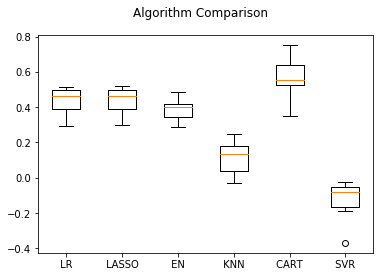

In [228]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [229]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Standardize the dataset
pipelines = []
pipelines.append(( ' ScaledLR ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' LR ' ,
    LinearRegression())])))
pipelines.append(( ' ScaledLASSO ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' LASSO ' ,
    Lasso())])))
pipelines.append(( ' ScaledEN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' EN ' ,
    ElasticNet())])))
pipelines.append(( ' ScaledKNN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' KNN ' ,
    KNeighborsRegressor())])))
pipelines.append(( ' ScaledCART ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' CART ' ,
    DecisionTreeRegressor())])))
pipelines.append(( ' ScaledSVR ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' SVR ' , SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledLR : 0.436425 (0.073162)
 ScaledLASSO : 0.437367 (0.069880)
 ScaledEN : 0.400410 (0.052469)
 ScaledKNN : 0.426861 (0.064192)
 ScaledCART : 0.557355 (0.091965)
 ScaledSVR : -0.090014 (0.089275)


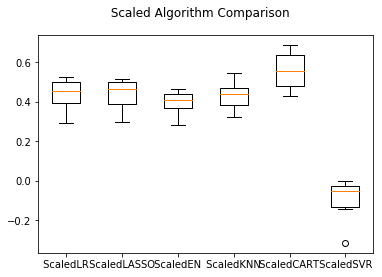

In [230]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle( ' Scaled Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [231]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# compute and print the R Square
print('R-squared score (training): {:.3f}'.format(regressor.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test, y_test)))

R-squared score (training): 0.483
R-squared score (test): 0.315


In [232]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=DeprecationWarning)

# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best neighbors number --> 9

Best: 0.429158 using {'n_neighbors': 9}
0.153323 (0.140669) with: {'n_neighbors': 1}
0.365146 (0.115978) with: {'n_neighbors': 3}
0.427672 (0.064106) with: {'n_neighbors': 5}
0.426599 (0.049783) with: {'n_neighbors': 7}
0.429158 (0.045540) with: {'n_neighbors': 9}
0.410573 (0.050431) with: {'n_neighbors': 11}
0.400975 (0.060027) with: {'n_neighbors': 13}
0.391538 (0.060658) with: {'n_neighbors': 15}
0.380833 (0.064153) with: {'n_neighbors': 17}
0.374601 (0.055812) with: {'n_neighbors': 19}
0.366976 (0.053668) with: {'n_neighbors': 21}


In [233]:
#KNN
rsquared=[]
neighbors=[9]
for i in neighbors:
    # Fit a KNN model
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train, y_train)
    # Compute R squared
    rsquared.append(knnreg.score(X_test, y_test))
    print('R-squared score (training): {:.3f}'.format(knnreg.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'.format(knnreg.score(X_test, y_test)))

R-squared score (training): 0.341
R-squared score (test): 0.136


In [234]:
# ensembles
ensembles = []
ensembles.append(( ' ScaledAB ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' AB ' ,
    AdaBoostRegressor())])))
ensembles.append(( ' ScaledGBM ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' GBM ' ,
    GradientBoostingRegressor())])))
ensembles.append(( ' ScaledRF ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' RF ' ,
    RandomForestRegressor())])))
ensembles.append(( ' ScaledET ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' ET ' ,
    ExtraTreesRegressor())])))

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledAB : 0.501530 (0.075634)
 ScaledGBM : 0.781774 (0.039008)
 ScaledRF : 0.742889 (0.040196)
 ScaledET : 0.741638 (0.059478)


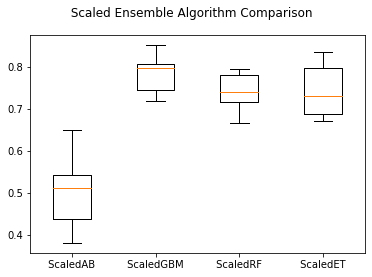

In [235]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle( ' Scaled Ensemble Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [236]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.782896 using {'n_estimators': 150}
0.760499 (0.031641) with: {'n_estimators': 50}
0.780296 (0.036992) with: {'n_estimators': 100}
0.782896 (0.040366) with: {'n_estimators': 150}
0.782692 (0.043507) with: {'n_estimators': 200}
0.781931 (0.042959) with: {'n_estimators': 250}
0.778957 (0.044559) with: {'n_estimators': 300}
0.777006 (0.044918) with: {'n_estimators': 350}
0.776414 (0.045926) with: {'n_estimators': 400}


In [237]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, y_train)

# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print('R-squared score (training): {:.3f}'.format(model.score(rescaledX, y_train)))
print('R-squared score (test): {:.3f}'.format(model.score(rescaledValidationX, y_test)))

R-squared score (training): 0.984
R-squared score (test): 0.698


In [238]:
# random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

print('R-squared score (training): {:.3f}'.format(regressor.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(X_test, y_test)))

R-squared score (training): 0.960
R-squared score (test): 0.951


In [239]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state = 0)
regressor1.fit(X, y)

print('R-squared score (training): {:.3f}'.format(regressor1.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor1.score(X_test, y_test)))

R-squared score (training): 1.000
R-squared score (test): 1.000
